pdf - функция плотности вероятности\
cdf - функция распределения\
isf - проц точка\
sf - обратная к isf\
ppf - квантиль

In [1]:
import numpy as np
from sympy import *
from scipy.stats import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.stats.weightstats import ztest as ztest

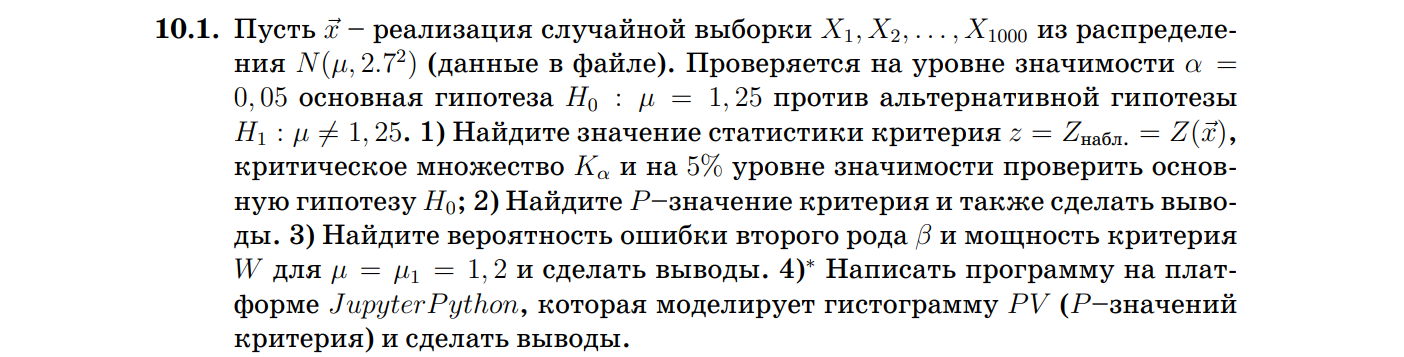

In [3]:
sample = pd.read_csv('sample10_1_PM2022.csv', delimiter=';', header=None, decimal=',')
sample = np.array(sample)

p-value для двустор. крит. об.: pv = 1 - 2$Ф_0(|Z_{набл}|) = 1 - 2(norm.cdf(Z) - 0.5)$

In [2]:
def Z_test_one_sample(data, alpha, sigma, mu0):
    """двустороння крит. область"""
    mn = np.mean(data) # выборочное среднее
    Z_st = (mn - mu0)/sigma*len(data)**0.5
    cvalue = norm.isf(alpha/2) # |Z_st| > Z_alpha/2 - промежуток (-oo,-cvalue)U(cvalue, +oo)
    pvalue = 2*(1 - norm.cdf(abs(Z_st))) # pv = 0.5 - Ф0 = 0.5 - (cdf(x) - 0.5) = 1 - cdf(x)
    return f'ген. среднее: {mn}, Z-статистика: {Z_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

In [74]:
Z_test_one_sample(sample, 0.05, 2.7, 1.25)
# pvalue < cvalue

'ген. среднее: 1.201995591679, Z-статистика: -0.5622343260114798, Крит.об: 1.9599639845400545, pvalue: 0.5739563770550327'

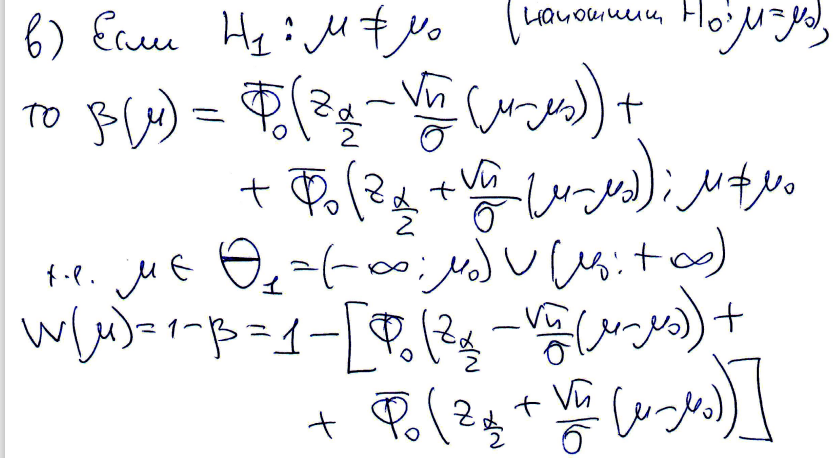

In [3]:
def betta(data, alpha, sigma, mu0, mu1):
    n = len(data)
    betta = norm.cdf(norm.isf(alpha/2) - n**.5*(mu1 - mu0)/sigma) - 0.5 + \
    norm.cdf(norm.isf(alpha/2) + n**.5*(mu1 - mu0)/sigma) - 0.5
    W = 1 - betta
    return betta, W

In [158]:
betta(sample, 0.05, 2.7, 1.25, 1.2)

(0.9098796029261775, 0.09012039707382247)

In [78]:
Z_test_one_sample(sample, 0.05, 2.7, 1.25)

'ген. среднее: 1.201995591679, Z-статистика: -0.5622343260114798, Крит.об: 1.9599639845400545, pvalue: 0.5739563770550327'

In [79]:
# test statistic, pvalue
ztest(sample, value=1.25, alternative='two-sided')

(array([-0.57476856]), array([0.56544783]))

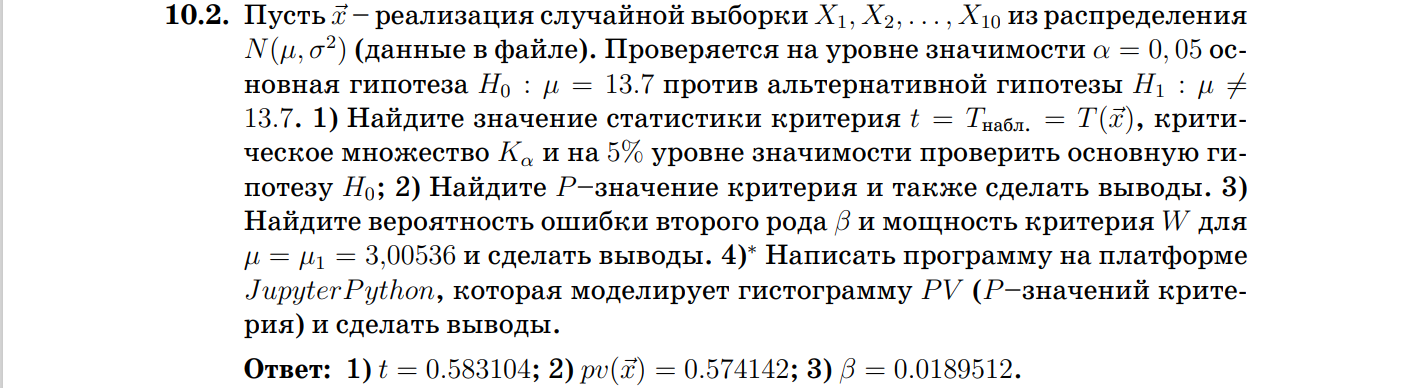

In [82]:
sample2 = pd.read_csv('sample10_2_PM2022.csv', delimiter=';', header=None, decimal=',')
sample2 = np.array(sample2)

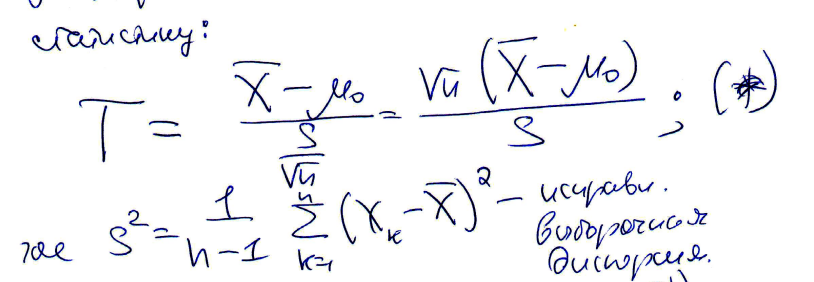

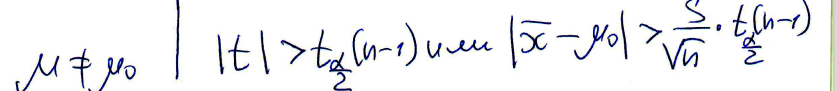

In [4]:
def T_test_one_sample(data, alpha, mu0):
    """двустороння крит. область"""
    S = np.var(data, ddof=True)
    mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    T_st = n**.5*(mn - mu0)/S**.5
    cvalue = T.isf(alpha/2)
    pvalue = 2*(1 - T.cdf(abs(T_st)))
    return f'.выб. среднее: {mn}, T-статистика: {T_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

In [92]:
T_test_one_sample(sample2, 0.05, 13.7)

'ген. среднее: 15.067265604600001, T-статистика: 0.5831039501860182, Крит.об: 2.262157162740992, pvalue: 0.5741416681136751'

In [90]:
ztest(sample2, value=13.7, alternative='two-sided')

(array([0.58310395]), array([0.55982332]))

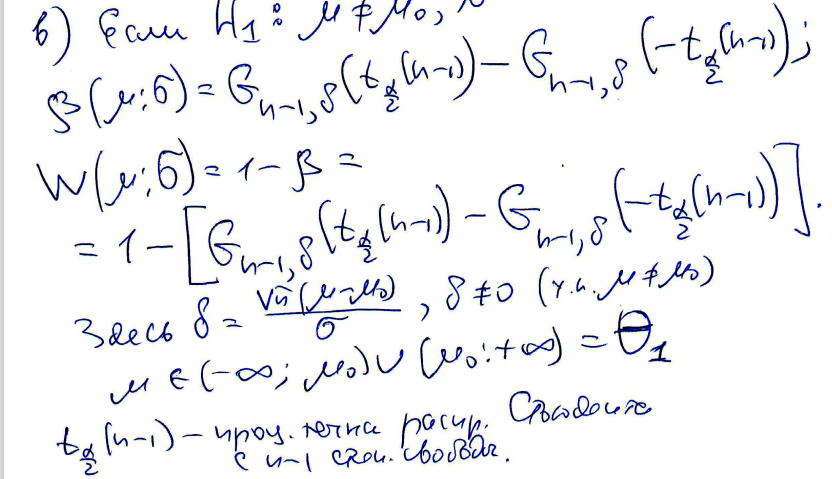

In [147]:
def betta_nct(data, alpha, mu0, mu1):
    S = np.var(data, ddof=True)
    #mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    delta = n**.5*(mu1 - mu0)/S**.5
    G = nct(n-1, delta)
    betta =  G.cdf(T.isf(alpha/2)) - G.cdf(-T.isf(alpha/2))
    W = 1 - betta
    return betta, W

In [148]:
betta_nct(sample2, 0.05,13.7, 3.00536)

(0.018951270387962182, 0.9810487296120378)

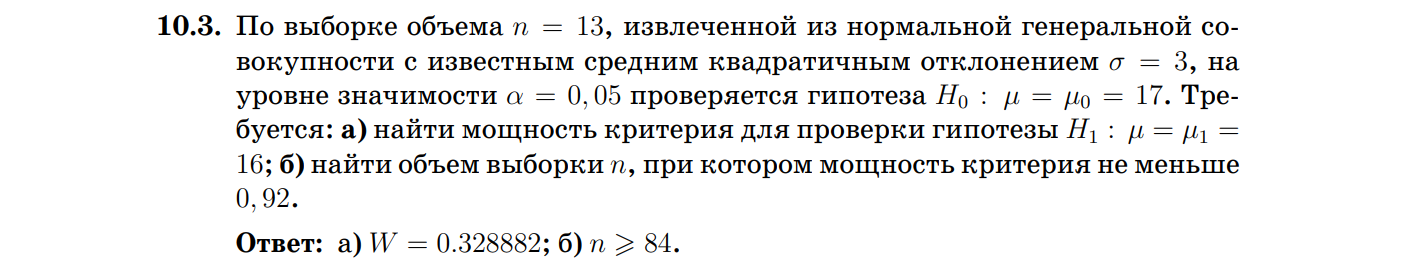

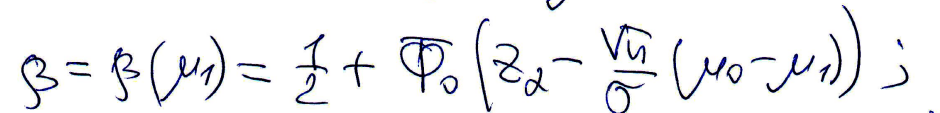

In [37]:
mu1 = 16
sigma = 3
mu0 = 17
alpha = 0.05
n = 13
# H1: mu1 < mu0
betta = 0.5 + norm.cdf(norm.isf(alpha) - n**.5*(mu0 - mu1)/sigma) - 0.5
W = 1 - betta
1 - betta

0.3288817094062537

In [38]:
w = W
while w < 0.92:
    n += 1
    betta = 0.5 + norm.cdf(norm.isf(alpha) - n**.5*(mu0 - mu1)/sigma) - 0.5
    w = 1 - betta
n

84

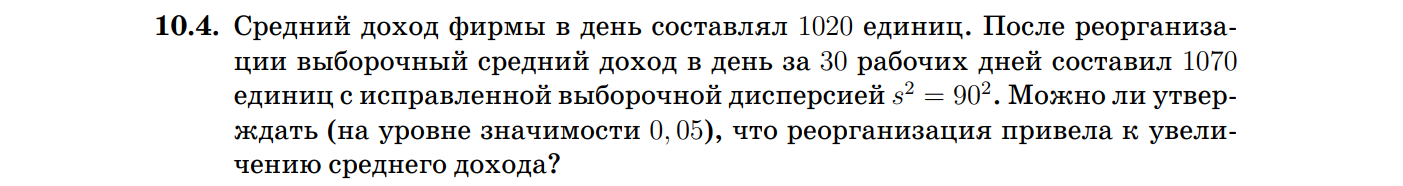

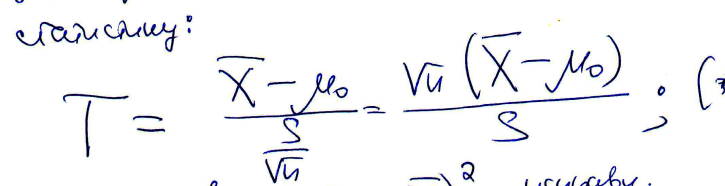

In [11]:
mn = 1020
S = 90
alpha = 0.05
mu0 = 1070
n = 30
T_st = (mn - mu0)/S*n**0.5
T = t(n-1)
cvalue = T.isf(alpha/2) # |T_st| > T_alpha/2 - промежуток (-oo,-cvalue)U(cvalue, +oo)
pvalue = 2*(1 - T.cdf(abs(T_st)))

In [14]:
T_st

-3.0429030972509232

In [12]:
cvalue

2.0452296421327034

In [13]:
pvalue

0.004939473358366087

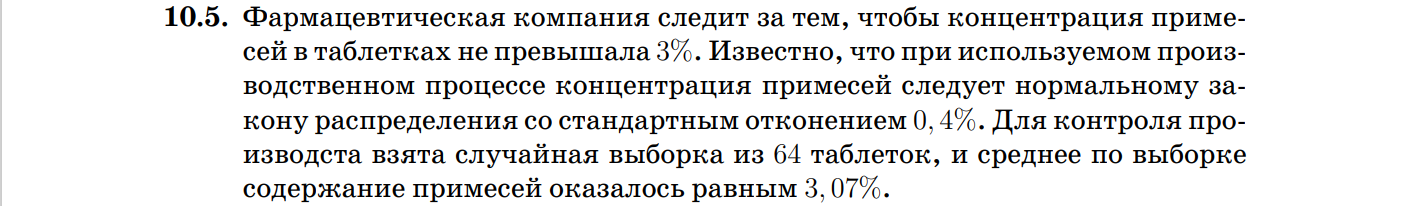

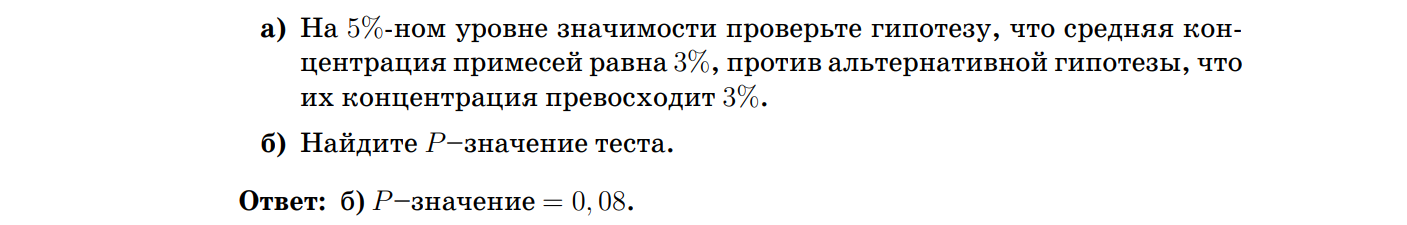

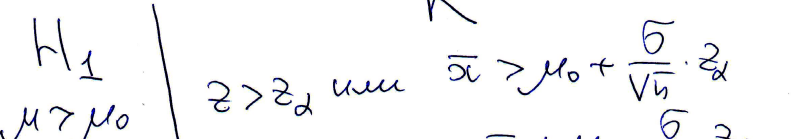

In [174]:
sgm = 0.4/100
n = 64
mn = 3.07/100

alpha = 5/100
mu0 = 3/100

Z_st = (mn - mu0)/sgm*n**0.5
cvalue = norm.isf(alpha)
pvalue = 1 - norm.cdf(Z_st) 

In [175]:
cvalue, pvalue

(1.6448536269514729, 0.08075665923377129)

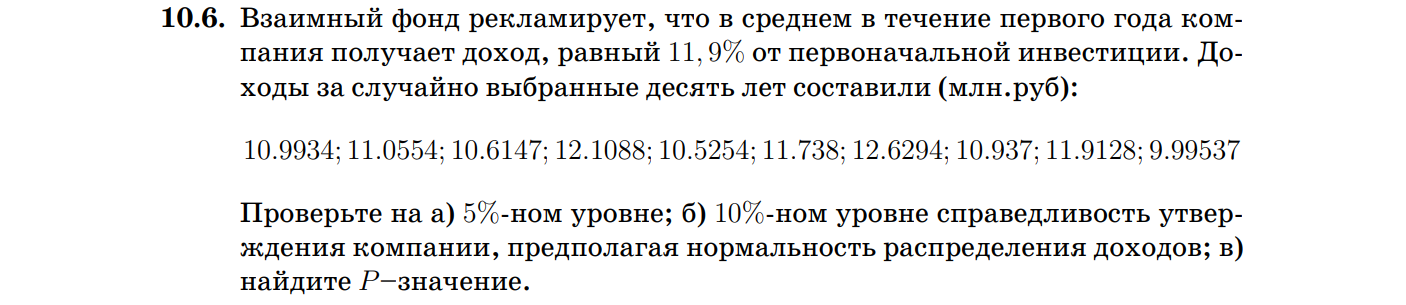

In [201]:
income = [10.9934, 11.0554, 10.6147, 12.1088, 10.5254, 11.738, 12.6294, 10.937, 11.9128, 9.99537]
r = 11.9/100
percent = [(income[i+1]/income[i] - 1) for i in range(0,len(income)-1)]
mn = np.mean(percent)

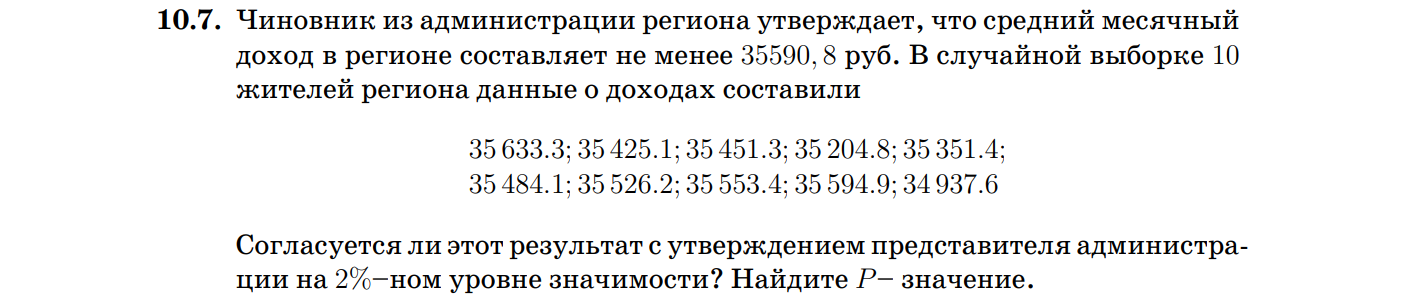

In [8]:
# H1: m1 > mu0
def T_test_one_sample_K1(data, alpha, mu0):
    """одн. крит. область mu1 > mu0"""
    S = np.var(data, ddof=True)
    mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    T_st = n**.5*(mn - mu0)/S**.5
    cvalue = T.isf(alpha)
    pvalue = T.sf(T_st)
    return f'.выб. среднее: {mn}, T-статистика: {T_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

In [9]:
inc = [35633.3, 35425.1, 35451.3, 35204.8, 35351.4,
35484.1, 35526.2, 35553.4, 35594.9, 34937.6]
T_test_one_sample_K1(inc, 0.02, 35590.8)

'.выб. среднее: 35416.21, T-статистика: -2.639188999981983, Крит.об: 2.398440984714667, pvalue: 0.9865252076957303'

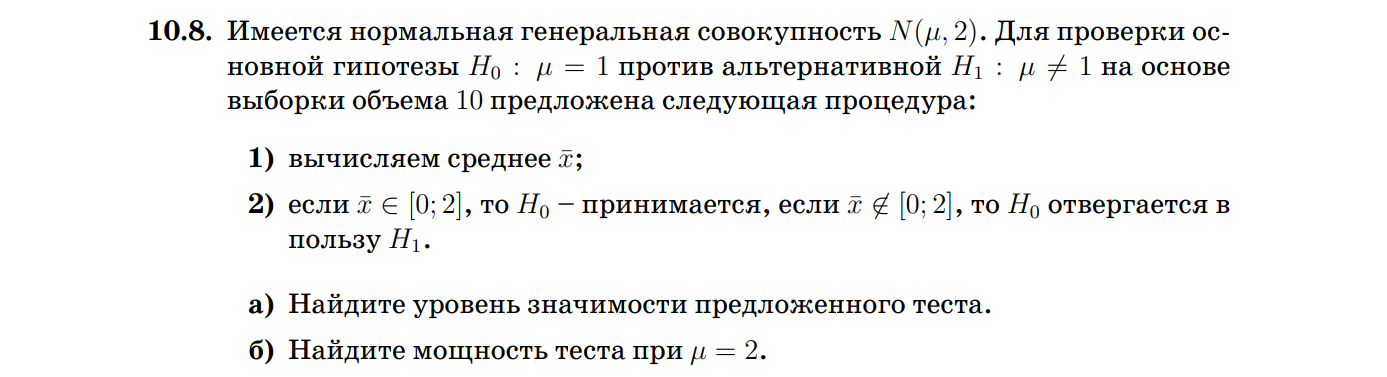

In [13]:
alpha = norm.sf(2)*2
alpha

0.04550026389635839

In [14]:
norm.isf(alpha/2)

2.000000000000001

In [16]:
mu0 = 1
mu1 = 2
n = 10
sigma = 2

betta = norm.cdf(norm.isf(alpha/2) - n**.5*(mu1 - mu0)/sigma) - 0.5 + \
    norm.cdf(norm.isf(alpha/2) + n**.5*(mu1 - mu0)/sigma) - 0.5
W = 1 - betta
W

0.3378298482777089